In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [7]:
# Step 2: Load and Prepare Training Data
train_df = pd.read_csv("train_data.csv", sep=';')
train_df = train_df.dropna()

In [8]:
# Step 3: Define Inputs and Output
X = train_df.drop('class', axis=1)  # Input features
y = train_df['class']               # Output label


In [9]:
# Step 4: Train-Test Split for Validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Step 5: Train the Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
# Step 6: Validate the Model
y_pred = model.predict(X_test)
print("Validation Accuracy:", accuracy_score(y_test, y_pred))

Validation Accuracy: 1.0


In [12]:
# Step 7: Load and Clean Test Data
test_df = pd.read_csv("test_data.csv", sep=';')
test_df = test_df.dropna()


In [13]:
# Step 8: Predict Using Test Data
if 'class' in test_df.columns:
    test_X = test_df.drop('class', axis=1)
else:
    test_X = test_df

test_predictions = model.predict(test_X)
print("Test Predictions:", test_predictions)


Test Predictions: [2 2 1 2 1 2 2 1 2 1 2 1 2 1 2 2 2 2 2 2 1 2 2 2 1 0 1 1 1 1 1 1 1 0 1 1 0
 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]


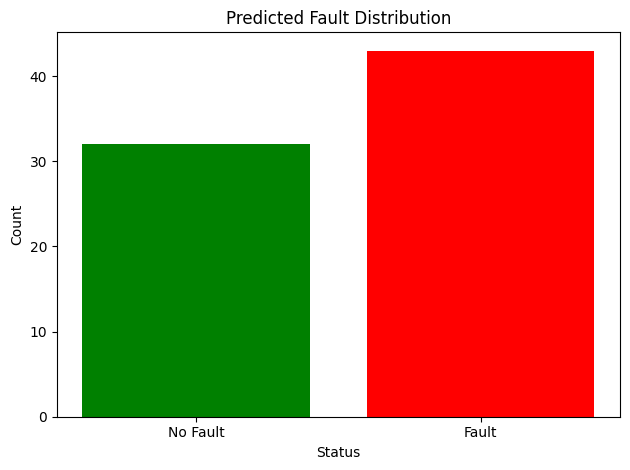

In [16]:
# Step 9: Fault vs No-Fault Bar Chart
no_fault = sum(test_predictions == 0)
fault = sum((test_predictions == 1) | (test_predictions == 2))  # Adjust if needed

plt.bar(['No Fault', 'Fault'], [no_fault, fault], color=['green', 'red'])
plt.title("Predicted Fault Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

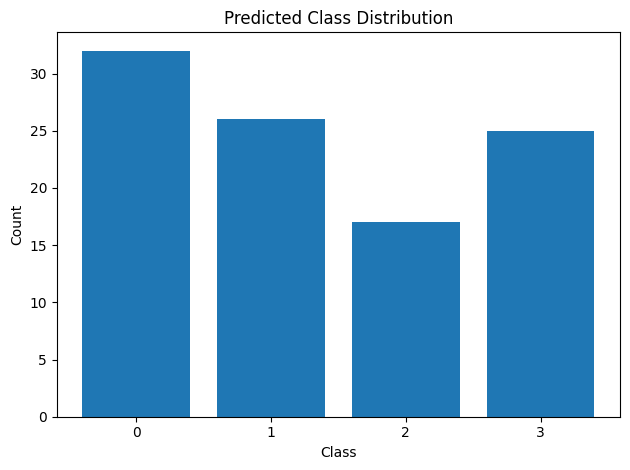

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        31
           3       1.00      1.00      1.00        35

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120



In [17]:
# Step 10: Class-Wise Prediction Distribution
unique, counts = np.unique(test_predictions, return_counts=True)
plt.bar([str(u) for u in unique], counts)
plt.title("Predicted Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()
import pandas as pd

pd.DataFrame(test_predictions, columns=["Predicted Class"]).to_csv("predicted_results.csv", index=False)
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))